In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
 df = pd.read_csv('creditcard.csv')
X = df.drop(columns=['Class'])  # Exclude the 'Class' column (response variable)
y = df['Class']  # 'Class' is the target variable (fraud or not)


In [7]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled = scaler.fit_transform(X_scaled)


In [9]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [13]:
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)


In [15]:
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [17]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Logistic Regression evaluation
lr_y_pred = lr_model.predict(X_test)
lr_y_prob = lr_model.predict_proba(X_test)[:, 1]


In [19]:
# Random Forest evaluation
rf_y_pred = rf_model.predict(X_test)
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]


In [20]:
# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



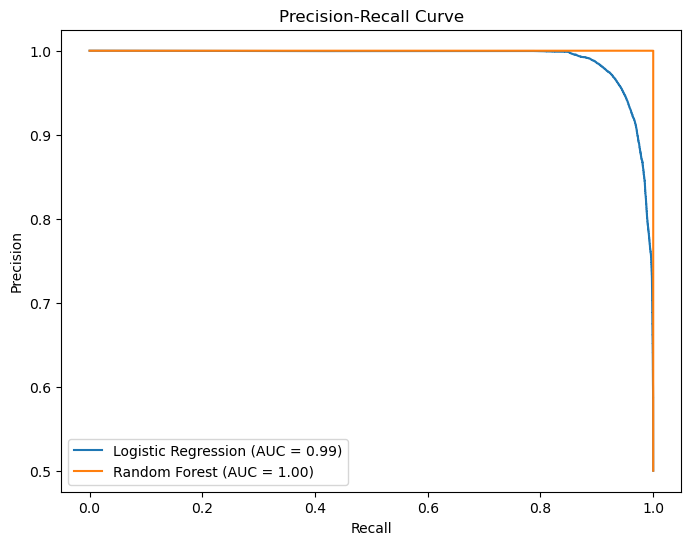

In [26]:
# Precision-Recall curve and AUPRC
def plot_pr_curve(y_test, lr_y_prob, rf_y_prob):
    # Precision-Recall curve for Logistic Regression
    precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_y_prob)
    auc_lr = auc(recall_lr, precision_lr)
       # Precision-Recall curve for Random Forest
    precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_y_prob)
    auc_rf = auc(recall_rf, precision_rf)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
    plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
# Plot Precision-Recall Curve
plot_pr_curve(y_test, lr_y_prob, rf_y_prob)
